# Description

Wine quality detection refers to the process of assessing the quality of wine based on various sensory and chemical characteristics. The quality of wine is determined by factors such as acidity, alcohol content,residual sugar, chlorides and density among others.

In traditional wine production, quality control is typically performed by human experts who taste and evaluate the wine based on their sensory perception. However, this process can be time-consuming, subjective, and may not be consistent across different tasters.

# Problem Statement

The challenge is to create a decision tree ID3 model that can accurately predict the quality rating of red wine based on its physicochemical properties, such as acidity, alcohol content, and volatile acidity.

# Importing Necessary Libraries

In [1]:
import pandas as pd     # used to perform mathematical operation on array
import numpy as np      # used for data manipulation
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine= pd.read_csv("winequality-red.csv")

# Exploratory Data Analysis

In [3]:
wine.shape     # Finding number of rows and columns

(1599, 12)

In [4]:
wine.describe()    # Returns description of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine.head()     # Checking the first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.tail()      # Checking the last 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
wine.info()       # checking the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Data Preprocessing

In [8]:
wine.isnull().sum().sort_values(ascending=False)      # Checking the null(missing) values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
num_attr=wine.select_dtypes(['int']).columns  
num_attr

Index(['quality'], dtype='object')

In [10]:
cat_attr = wine.select_dtypes('object').columns
cat_attr

Index([], dtype='object')

# Outlier detection

In [11]:
# Define the features to check for outliers
features = ['alcohol','pH','residual sugar']

# Define a function to detect outliers based on the interquartile range (IQR)
def detect_outliers_IQR(data, threshold=1.5):
    """
    Detects outliers in a 1D array using the interquartile range (IQR) method.
    
    Args:
        data (np.ndarray): A 1D array of data.
        threshold (float): A threshold multiplier for the IQR.      
    Returns:
        np.ndarray: A boolean array indicating the outliers.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + threshold*IQR
    lower_bound = Q1 - threshold*IQR
    outliers = (data > upper_bound) | (data < lower_bound)
    return outliers

# Check for outliers in each feature
for feature in features:
    outliers = detect_outliers_IQR(wine[feature].dropna())
    n_outliers = np.sum(outliers)
    print(f'{n_outliers} outliers detected in {feature}')

13 outliers detected in alcohol
35 outliers detected in pH
155 outliers detected in residual sugar


# Outlier treatment

In [12]:
# Define the features to remove outliers from
features = ['alcohol','pH','residual sugar']

# Define a function to remove outliers based on the interquartile range (IQR)
def remove_outliers_IQR(data, threshold=1.5):
    """
    Removes outliers in a 1D array using the interquartile range (IQR) method.
    
    Args:
        data (np.ndarray): A 1D array of data.
        threshold (float): A threshold multiplier for the IQR.
        
    Returns:
        np.ndarray: A 1D array of data with outliers removed.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + threshold*IQR
    lower_bound = Q1 - threshold*IQR
    data_clean = data[(data >= lower_bound) & (data <= upper_bound)]
    return data_clean

# Remove outliers from each feature
for feature in features:
    data_clean = remove_outliers_IQR(wine[feature].dropna())
    n_outliers = len(wine[feature].dropna()) - len(data_clean)
    print(f'{n_outliers} outliers removed from {feature}')
    wine[feature] = data_clean

# Save the cleaned dataset to a new CSV file
wine.to_csv('wine_clean.csv', index=False)

13 outliers removed from alcohol
35 outliers removed from pH
155 outliers removed from residual sugar


# Data Visualization

In [13]:
import matplotlib.pyplot as plt;   # used for data visualization
import seaborn as sns              # used for data visualization

<BarContainer object of 1599 artists>

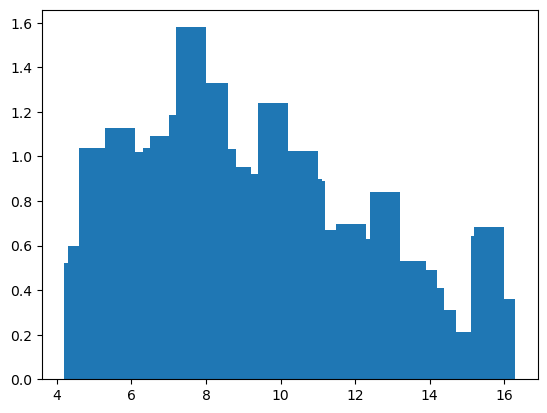

In [14]:
plt.bar(wine['fixed acidity'], wine['volatile acidity'])

In [15]:
# calculating the correlation of complete dataset

corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.264818,0.093705,-0.153794,-0.113181,0.668047,-0.668788,0.183006,-0.038312,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.011472,0.061298,-0.010504,0.076470,0.022026,0.240187,-0.260987,-0.193549,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.173068,0.203823,-0.060978,0.035533,0.364947,-0.535667,0.312770,0.126736,0.226373
residual sugar,0.264818,0.011472,0.173068,1.000000,0.025136,0.042534,0.109509,0.413949,-0.069011,0.014766,0.087371,0.038105
chlorides,0.093705,0.061298,0.203823,0.025136,1.000000,0.005562,0.047400,0.200632,-0.243249,0.371260,-0.213632,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.042534,0.005562,1.000000,0.667666,-0.021946,0.082127,0.051658,-0.086100,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.109509,0.047400,0.667666,1.000000,0.071269,-0.071639,0.042947,-0.231163,-0.185100
density,0.668047,0.022026,0.364947,0.413949,0.200632,-0.021946,0.071269,1.000000,-0.310911,0.148506,-0.467509,-0.174919
pH,-0.668788,0.240187,-0.535667,-0.069011,-0.243249,0.082127,-0.071639,-0.310911,1.000000,-0.191623,0.143862,-0.077170
sulphates,0.183006,-0.260987,0.312770,0.014766,0.371260,0.051658,0.042947,0.148506,-0.191623,1.000000,0.076104,0.251397


<AxesSubplot:>

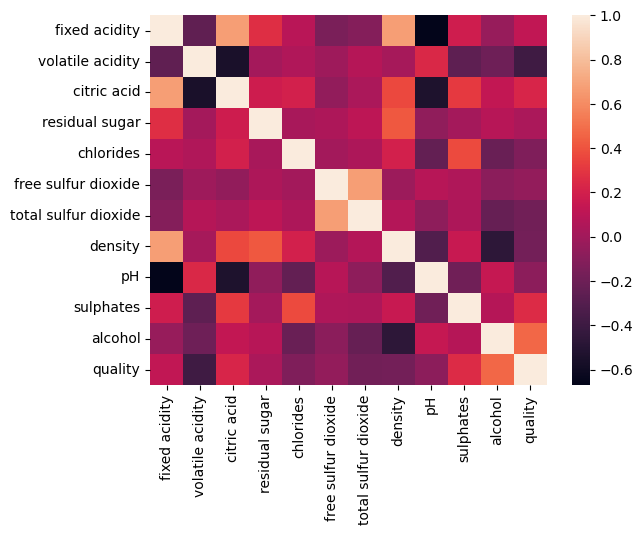

In [16]:
# Visulaizing the heatmap of complete dataset

sns.heatmap(corr)

<AxesSubplot:xlabel='residual sugar', ylabel='count'>

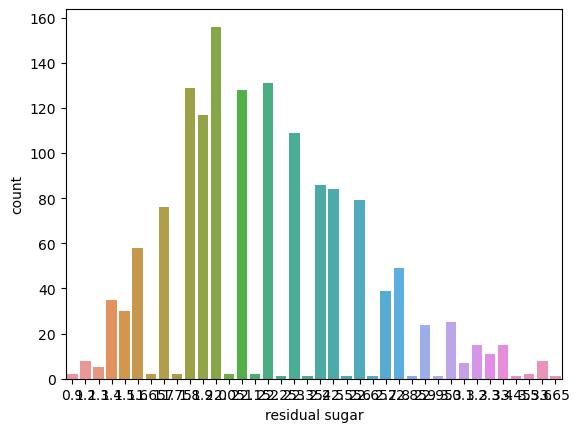

In [17]:
sns.countplot(x='residual sugar',data=wine)

# Implement Decision Tree Regression(ID3)

# Defining a Node Class

In [18]:
import numpy as np

class Node:
   
    def __init__(self, feature=None, threshold=None, value=None, var_red=None, left=None, right=None):
        
         # for decision node
        self.feature = feature      # feature to split on
        self.threshold = threshold  # threshold value to split on
        self.left = left            # left subtree
        self.right = right          # right subtree
        self.var_red = var_red      # variance reduction
        
        # for leaf node
        self.value = value          # predicted value 

# Defining a Tree Class

In [19]:
class DecisionTree:
    
    def __init__(self, min_samples_split=4, max_depth=3):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y):
        self.tree = self.build_tree(X, y)
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            node = self.tree
            while node.feature is not None:
                if x[node.feature] <= node.threshold:
                    node = node.left
                else:
                    node = node.right
            y_pred[i] = node.value
        return y_pred
    
    def build_tree(self, X, y):
        if X.shape[0] <= self.min_samples_split:
            return Node(value=self.get_leaf_value(y))
        
        # Split the data into two branches
        best_feature, best_threshold, best_var_red = self.find_best_split(X, y)
        if best_feature is None:
            return Node(value=self.get_leaf_value(y))
        
        dataset_left = X[:, best_feature] <= best_threshold
        dataset_right = ~dataset_left
        left_tree = self.build_tree(X[dataset_left], y[dataset_left])
        right_tree = self.build_tree(X[dataset_right], y[dataset_right])
        
        return Node(feature=best_feature, threshold=best_threshold, var_red=best_var_red, left=left_tree, right=right_tree)
    
    def find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_var_red = 0
        
        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = (sorted_X[1:] + sorted_X[:-1]) / 2
            for threshold in thresholds:
                dataset_left = X[:, feature] <= threshold
                dataset_right = ~dataset_left
                
                if dataset_left.sum() < self.min_samples_split or dataset_right.sum() < self.min_samples_split:
                    continue
                
                var_red = self.get_var_red(y, dataset_left, dataset_right)
                
                if var_red > best_var_red:
                    best_var_red = var_red
                    best_feature = feature
                    best_threshold = threshold
        
        if best_feature is not None:
            return best_feature, best_threshold, best_var_red
        else:
            return None, None, None
    
    def get_var_red(self, y, dataset_left, dataset_right):
        observed = np.array([
            [np.sum(y[dataset_left] == 0), np.sum(y[dataset_left] == 1)],
            [np.sum(y[dataset_right] == 0), np.sum(y[dataset_right] == 1)]
        ])
        expected = np.array([
            [np.sum(dataset_left) * np.sum(y == 0), np.sum(dataset_left) * np.sum(y == 1)],
            [np.sum(dataset_right) * np.sum(y == 0), np.sum(dataset_right) * np.sum(y == 1)]
        ]) / y.shape[0]
        var_red = np.sum((observed - expected) ** 2 / expected)
        return var_red
    
    def get_leaf_value(self, y):
        return np.bincount(y).argmax()
    
    def hyperparameter_tuning(self, X, y, n_folds=8, max_depth_values=[4], min_samples_values=[2]):
        best_params = {'max_depth': 4, 'min_samples': 2}
        best_mse = float('inf')

        for max_depth in max_depth_values:
            for min_samples in min_samples_values:
                mse_scores = []
                fold_size = len(X) // n_folds
                for i in range(n_folds):
                    X_train = X.drop(X.index[i * fold_size:(i + 1) * fold_size])
                    X_test = X.iloc[i * fold_size:(i + 1) * fold_size]
                    y_train = y.drop(y.index[i * fold_size:(i + 1) * fold_size])
                    y_test = y.iloc[i * fold_size:(i + 1) * fold_size]
                    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples, min_samples_leaf=self.min_samples_leaf)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    mse = self._mse(y_test, y_pred)
                    mse_scores.append(mse)
                mean_mse = sum(mse_scores) / len(mse_scores)
                if mean_mse < best_mse:
                    best_mse = mean_mse
                    best_params['max_depth'] = max_depth
                    best_params['min_samples'] = min_samples

        self.max_depth = best_params['max_depth']
        self.min_samples_split = best_params['min_samples']

        return best_params


# Split the data into train and test 

In [20]:
# Define the target variable and the features
target = 'quality'
features = [col for col in wine.columns if col != target]

# Split the data into training and testing sets
train_size = int(0.8 * len(wine))
train_df = wine[:train_size]
test_df = wine[train_size:]

# Split the training and testing sets into X and y
X_train = train_df[features].values
y_train = train_df[target].values
X_test = test_df[features].values
y_test = test_df[target].values


In [21]:
import time
# record start time
start_time = time.time()

In [22]:
regressor = DecisionTree()

In [23]:
regressor.fit(X_train,y_train)

In [24]:
y_pred=regressor.predict(y_test)

In [25]:
# Define the mean squared error function
def mse(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()
mse_value = mse(y_test, y_pred)
print('Mean Squared Error:', mse_value)


Mean Squared Error: 0.88125


In [26]:
# Compute the mean absolute error
mae = np.mean(np.abs(y_pred - y_test))
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.65625


In [27]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the code: {:.2f} seconds".format(time_taken))

Time taken to run the code: 6.10 seconds
